In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy


In [2]:
engine = sqlalchemy.create_engine(r"sqlite:///D:\alphavantage\intraday_av.db")

In [3]:
stocks  = ['MMM', 'AXP', 'AAPL', 'AMGN', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'GS',
     'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'NVDA',
     'PG', 'CRM', 'SHW', 'TRV', 'UNH', 'VZ', 'V', 'WMT', 'DIS', 'AMZN']

In [5]:
b_df = pd.DataFrame( )

for stock in stocks :
    
    query = f"SELECT * FROM {stock}"
    df = pd.read_sql_query( query , engine  )[['index','4. close']]
    df['index'] = pd.to_datetime( df['index'] )
    df  =  df.set_index('index')
    df = df[~df.index.duplicated(keep='first')]
    b_df[f'{stock}'] = df


In [6]:
bb_df = b_df.ffill().dropna().astype('float')

In [7]:
bb_df = np.log( bb_df /  bb_df.shift(1) ).dropna()

In [8]:
dji_df = pd.DataFrame( )
for i,j in enumerate(bb_df.columns) :

    dji_df.loc[i,'ticker'] = j
    dji_df.loc[i,'Return'] = bb_df[f'{j}'].mean() * 252
    dji_df.loc[i,'Volatility'] = bb_df[f'{j}'].std() * np.sqrt(252)


dji_df

,ticker,Return,Volatility
0,MMM,-1.249411e-05,0.055053
1,AXP,-5.589992e-06,0.064183
2,AAPL,2.994636e-05,0.128469
3,AMGN,1.070998e-05,0.055952
4,BA,9.680322e-06,0.057880
5,CAT,4.038512e-05,0.079964
6,CVX,-9.204237e-06,0.055521
7,CSCO,-8.615412e-06,0.044457
8,KO,2.707265e-05,0.041953
9,GS,-1.589183e-05,0.062600


In [9]:
dji_df = dji_df.set_index('ticker')

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform data
scaled_data = scaler.fit_transform(dji_df)


c:\Users\zig53\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zig53\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zig53\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zig53\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

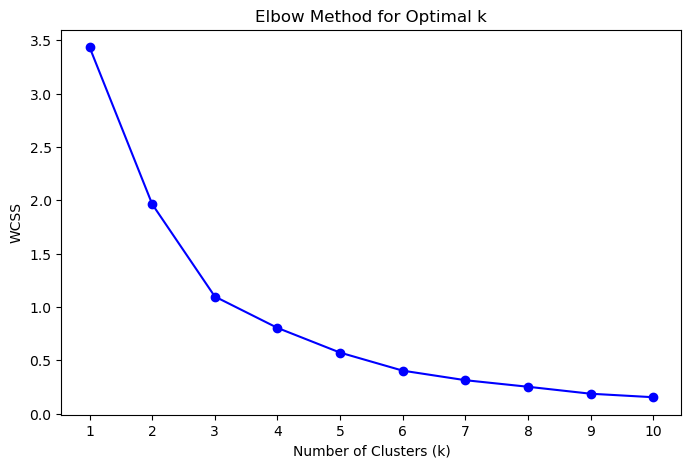

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Apply KMeans for different k values
wcss = []  # Within-cluster sum of squares
K = range(1, 11)  # Testing k from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.show()


K = 4

c:\Users\zig53\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


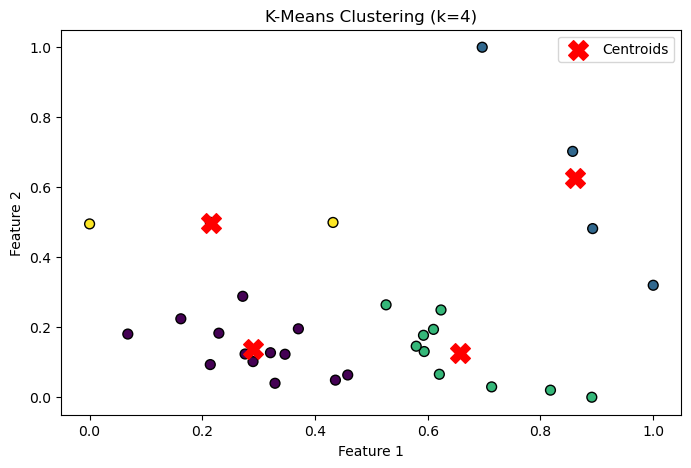

In [12]:
from sklearn.cluster import KMeans

# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_data)

# Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering (k=4)")
plt.legend()
plt.show()


In [13]:
dji_df['cluster'] = labels
dji_df

,Return,Volatility,cluster
ticker,,,
MMM,-1.249411e-05,0.055053,0
AXP,-5.589992e-06,0.064183,0
AAPL,2.994636e-05,0.128469,1
AMGN,1.070998e-05,0.055952,2
BA,9.680322e-06,0.057880,2
CAT,4.038512e-05,0.079964,1
CVX,-9.204237e-06,0.055521,0
CSCO,-8.615412e-06,0.044457,0
KO,2.707265e-05,0.041953,2


In [14]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    return result[1]  

In [15]:
b_df = b_df.ffill().dropna()

In [16]:
import itertools
def cointegration_test(stock_data):
    # Get all pairs of stocks
    stock_pairs = list(itertools.combinations(stock_data.columns, 2))
    
    results = []
    for pair in stock_pairs:
        stock1, stock2 = pair
        
        # Regress stock2 on stock1
        X = sm.add_constant(stock_data[stock1])  # Add constant term for intercept
        model = sm.OLS(stock_data[stock2], X).fit()
        
        # Get residuals from the regression
        residuals = model.resid
        
        # Perform ADF test on residuals to check for stationarity
        p_value = adf_test(residuals)
        
        # If p-value < 0.05, they are cointegrated
        if p_value < 0.05:
            results.append((stock1, stock2, p_value))  # Record cointegrated pairs
    
    return results

In [17]:
b_df = b_df.astype('float')

In [ ]:
cointegrated_pairs = cointegration_test(b_df)

In [ ]:
dji_df

In [ ]:
coint = pd.DataFrame(cointegrated_pairs).sort_values( 2 , ascending = True )
coint = coint.set_index(0)
coint['cluster_A'] = dji_df['cluster']
coint = coint.reset_index().set_index(1)
coint['cluster_B'] = dji_df['cluster']
coint

In [ ]:
coint = coint[ coint['cluster_A'] == coint['cluster_B'] ].sort_values( ['cluster_A',2 ] ).reset_index()
coint

,index,1,0,2,cluster_A,cluster_B
0,0,GS,CAT,3.359339e-03,0,0
1,1,GS,AXP,5.720848e-03,0,0
2,2,TRV,JPM,7.942967e-03,0,0
3,3,CAT,AXP,9.399538e-03,0,0
4,4,TRV,GS,9.927319e-03,0,0
5,5,TRV,AXP,1.070728e-02,0,0
6,6,JPM,CAT,3.986967e-02,0,0
7,7,JPM,AXP,4.968819e-02,0,0
8,8,AMZN,CRM,6.255225e-07,2,2
9,9,SHW,CRM,2.805137e-05,2,2


In [ ]:
pairs = coint.loc[coint.groupby('cluster_A')[2].idxmin().values]
pairs.columns =  ['index','symbol_1', 'symbol_2', 'p_value', 'cluster_A', 'cluster_B']
pairs

,index,symbol_1,symbol_2,p_value,cluster_A,cluster_B
0,0,GS,CAT,3.359339e-03,0,0
8,8,AMZN,CRM,6.255225e-07,2,2
27,27,JNJ,HON,1.459406e-05,3,3
